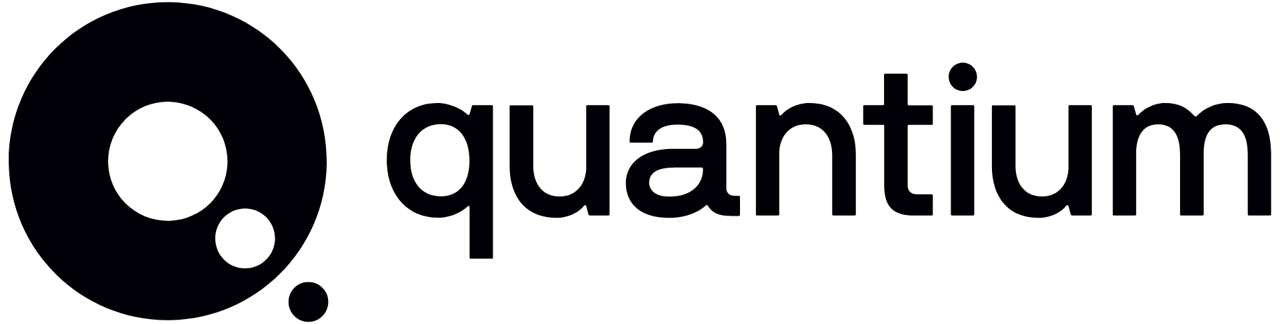

# <en><center><b>Quantium Exploratory Data Analysis</b></center></en>

## <en><center><b>Frantz Alexander</b></center></en>

__Case Study Highlights:__
<blockquote>
Perform analysis on consumer transaction data.
    <br>Extrapolate essential business metrics.
<br>Derive insights from key trends on consumer segments.
</blockquote>

## <en><center>Libraries</center></en>

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

%matplotlib inline

plt.style.use("dark_background")

## <en><center>Data Preparation</center></en>

### Import Dataset

In [150]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    
    # Setting column names to lower case
    df.columns = df.columns.str.lower()
    
    return df

In [151]:
df = wrangle("QVI_transaction_data.csv")

### <en><center>Data Preprocessing</center></en>

##### Display the number of entries, the names and number of column features, <br>the data type, and the memory space used.

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            264836 non-null  object 
 1   store_nbr       264836 non-null  int64  
 2   lylty_card_nbr  264836 non-null  int64  
 3   txn_id          264836 non-null  int64  
 4   prod_nbr        264836 non-null  int64  
 5   prod_name       264836 non-null  object 
 6   prod_qty        264836 non-null  int64  
 7   tot_sales       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


<blockquote>
    This dataset consists of: 264836 records with 8 column features.
    <br><b>Column Feature Description:</b>
    <br>date: refers to the date of the transaction.
    <br>store_nbr: refers to the unique store id number.
    <br>lylty_card_nbr: refers to the customer loyalty card number id.
    <br>txn_id: refers to the transaction id of a product purchase.
    <br>prod_nbr: refers to the product id.
    <br>prod_name: refers to the product name.
    <br>prod_qty: refers to the quantity of products sold.
    <br>tot_sales: refers to the total sales revenue received from each sales transaction.
</blockquote>

#### Setting date column to datetime

In [153]:
df["date"] =  pd.to_datetime(df["date"])

##### Checking the first 5 rows of the transaction dataset

In [154]:
df.head()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


##### Checking for Null values

In [155]:
df.isnull().sum()

date              0
store_nbr         0
lylty_card_nbr    0
txn_id            0
prod_nbr          0
prod_name         0
prod_qty          0
tot_sales         0
dtype: int64

##### Assessing for Duplicated Entries

In [156]:
df[df.duplicated(subset = None, keep = False)]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales
124843,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0
124845,2018-10-01,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


##### Removing Duplicated Entries

In [157]:
df = pd.DataFrame.drop_duplicates(df)

##### Checking the Number of Stores

In [158]:
df["store_nbr"].nunique()

272

##### Checking the Number of Unique Values in the Product Name Column

In [159]:
df["prod_name"].nunique()

114

##### Assessing the Unique Values in the Product Name Column 

In [160]:
df["prod_name"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

<blockquote>There is presence of inconsistent formatting for many of the product names including the names of product manufacturers.
<br> Brand names that need adjusting: Natural Chip        Compny, Natural ChipCo and NCC all refer to the Natural Chip Company, GrnWves refers to Grain Waves, Infzns refers to Infuzions, RRD refers to Red Rock Deli, Snbts to Sunbites.
<br>They will need to be adjusted before performing the analysis.
<br>This will ensure that the data quality is high.
<br>Additional columns will be created to categorize the company brand and product type. 
</blockquote>

#### Adjusting the formatting for the Product names

In [161]:
replace_product_names = {
    "Natural Chip        Compny SeaSalt175g" : " Natural Chip Company| Potato Chips| Sea Salt| 175g",
    "CCs Nacho Cheese    175g" : " CCs| Corn Chips| Nacho Cheese| 175g",
    "Grain Waves         Sweet Chilli 210g" : " Grain Waves| Corn Chips| Sweet Chilli| 210g",
    "Smiths Crinkle Cut  Chips Chicken 170g" : " Smiths| Potato Chips| Crinkle Cut Chips Chicken| 170g",
    "Smiths Chip Thinly  S/Cream&Onion 175g" : " Smiths| Potato Chips| Thinly Cut Sour Cream & Onion| 175g",
    "Old El Paso Salsa   Dip Tomato Mild 300g" : " Old El Paso| Salsa Dip| Salsa Dip Tomato Mild| 300g",
    "Grain Waves Sour    Cream&Chives 210G" : " Grain Waves| Corn Chips| Sour Cream & Chives| 210g",
    "Kettle Sensations   Siracha Lime 150g" : " Kettle| Potato Chips| Sensations Siracha Lime| 150g",
    "Twisties Cheese     270g" : " Twisties| Corn Chips| Cheese| 270g",
    "WW Crinkle Cut      Chicken 175g" : " Woolworths| Potato Chips| Crinkle Cut Chicken| 175g",
    "Thins Chips Light&  Tangy 175g" : " Thins Chips| Potato Chips| Light & Tangy| 175g",
    "NCC Sour Cream &    Garden Chives 175g" : " Natural Chip Company| Potato Chips| Sour Cream & Garden Chives| 175g",
    "Smiths Crinkle      Original 330g" : " Smiths| Potato Chips| Crinkle Original| 330g",
    "Kettle Sea Salt     And Vinegar 175g" : " Kettle| Potato Chips| Sea Salt And Vinegar| 175g",
    "Smiths Chip Thinly  Cut Original 175g" : " Smiths| Potato Chips| Chip Thinly Cut Original| 175g",
    "Red Rock Deli SR    Salsa & Mzzrlla 150g" : " Red Rock Deli| Potato Chips| Special Reserve Salsa & Mozzarella| 150g",
    "Thins Chips         Originl saltd 175g" : " Thins Chips| Potato Chips| Original Salted| 175g",
    "Red Rock Deli Sp    Salt & Truffle 150G" : " Red Rock Deli| Potato Chips| Sea Salt & Black Truffle| 150g",
    "Smiths Thinly       Swt Chli&S/Cream175G" : " Smiths| Potato Chips| Thinly Sweet Chilli & Sour Cream| 175g",
    "Doritos Mexicana    170g" : " Doritos| Corn Chips| Mexicana| 170g",
    "Smiths Crinkle Cut  French OnionDip 150g" : " Smiths| Potato Chips| Crinkle Cut French Onion Dip| 150g",
    "Natural ChipCo      Hony Soy Chckn175g" : " Natural Chip Company| Potato Chips| Honey Soy Chicken| 175g",
    "Kettle Tortilla ChpsHny&Jlpno Chili 150g" : " Kettle| Potato Chips| Tortilla Chips Honey & Jalapeno Chili| 150g",
    "Smiths Crinkle Chips Salt & Vinegar 330g" : " Smiths| Potato Chips| Crinkle Chips Salt & Vinegar| 330g",
    "Doritos Corn Chip Mexican Jalapeno 150g" : " Doritos| Corn Chips| Corn Chip Mexican Jalapeno| 150g",
    "CCs Original 175g" : " CCs| Corn Chips| Original| 175g",
    "Burger Rings 220g" : " Burger Rings|Corn Chips| Burger Rings| 220g",
    "Doritos Corn Chip Southern Chicken 150g" : " Doritos| Corn Chips| Corn Chip Southern Chicken| 150g",
    "Cheezels Cheese Box 125g" : " Cheezels|Corn Chips| Cheese Box| 125g",
    "Infzns Crn Crnchers Tangy Gcamole 110g" : " Infuzions| Corn Chips| Corn Crunchers Tangy Guacamole| 110g",
    "Kettle Original 175g" : " Kettle| Potato Chips| Original| 175g",
    "Red Rock Deli Thai  Chilli&Lime 150g" : " Red Rock Deli| Potato Chips| Thai Chilli & Lime| 150g",
    "Pringles Sthrn FriedChicken 134g" : " Pringles| Potato Chips| Southern Fried Chicken| 134g",
    "Pringles Sweet&Spcy BBQ 134g" : " Pringles| Potato Chips| Sweet & Spicy BBQ| 134g",
    "Kettle Chilli 175g" : " Kettle| Potato Chips| Chilli| 175g",
    "Dorito Corn Chp     Supreme 380g" : " Doritos| Corn Chips| Corn Chips Supreme| 380g",
    "Twisties Chicken270g" : " Twisties| Corn Chips| Chicken| 270g",
    "Smiths Thinly Cut   Roast Chicken 175g" : " Smiths| Potato Chips| Thinly Cut Roast Chicken| 175g",
    "Smiths Crinkle Cut  Tomato Salsa 150g" : " Smiths| Potato Chips| Crinkle Cut Tomato Salsa| 150g",
    "Kettle Mozzarella   Basil & Pesto 175g" : " Kettle| Potato Chips| Mozzarella Basil & Pesto| 175g",
    "Infuzions Thai SweetChili PotatoMix 110g" : " Infuzions| Corn Chips| Thai Sweet Chili Potato Mix| 110g",
    "Kettle Sensations   Camembert & Fig 150g" : " Kettle| Potato Chips| Sensations Camembert & Fig| 150g",
    "Smith Crinkle Cut   Mac N Cheese 150g" : " Smiths| Potato Chips| Crinkle Cut Mac N Cheese| 150g",
    "Kettle Honey Soy    Chicken 175g" : " Kettle| Potato Chips| Honey Soy Chicken| 175g",
    "Thins Chips Seasonedchicken 175g" : " Thins| Potato Chips| Chips Seasoned Chicken| 175g",
    "Smiths Crinkle Cut  Salt & Vinegar 170g" : " Smiths| Potato Chips| Crinkle Cut Salt & Vinegar| 170g",
    "Infuzions BBQ Rib   Prawn Crackers 110g" : " Infuzions| Corn Chips| BBQ Rib Prawn Crackers| 110g",
    "GrnWves Plus Btroot & Chilli Jam 180g" : " Grain Waves| Corn Chips| Plus Beetroot & Chilli Jam| 180g",
    "Tyrrells Crisps     Lightly Salted 165g" : " Tyrrells| Potato Chips| Crisps Lightly Salted| 165g",
    "Kettle Sweet Chilli And Sour Cream 175g" : " Kettle| Potato Chips| Sweet Chilli & Sour Cream| 175g",
    "Doritos Salsa       Medium 300g" : " Doritos| Salsa Dip| Salsa Medium| 300g",
    "Kettle 135g Swt Pot Sea Salt" : " Kettle| Potato Chips| Sweet Potato Sea Salt| 135g",
    "Pringles SourCream  Onion 134g" : " Pringles| Potato Chips| Sour Cream & Onion| 134g",
    "Doritos Corn Chips  Original 170g" : " Doritos| Corn Chips| Original| 170g",
    "Twisties Cheese     Burger 250g" : " Smiths| Potato Chips| Twisties Cheese Burger| 250g",
    "Old El Paso Salsa   Dip Chnky Tom Ht300g" : " Old El Paso| Salsa Dip| Hot Chunky Tomato Salsa Dip| 300g",
    "Cobs Popd Swt/Chlli &Sr/Cream Chips 110g" : " Cobs Popd| Potato Chips| Sweet Chlli & Sour Cream Chips| 110g",
    "Woolworths Mild     Salsa 300g" : " Woolworths| Salsa Dip| Mild Salsa| 300g",
    "Natural Chip Co     Tmato Hrb&Spce 175g" : " Natural Chip Company| Potato Chips| Tomato Herbs & Spice| 175g",
    "Smiths Crinkle Cut  Chips Original 170g" : " Smiths| Potato Chips| Crinkle Cut Chips Original| 170g",
    "Cobs Popd Sea Salt  Chips 110g" : " Cobs Popd| Potato Chips| Sea Salt Chips| 110g",
    "Smiths Crinkle Cut  Chips Chs&Onion170g" : " Smiths|Potato Chips| Crinkle Cut Chips Cheess & Onion| 170g",
    "French Fries Potato Chips 175g" : " French Fries| Potato Chips| Original Potato Chips| 175g",
    "Old El Paso Salsa   Dip Tomato Med 300g" : " Old El Paso| Salsa Dip| Salsa Dip Tomato Medium| 300g",
    "Doritos Corn Chips  Cheese Supreme 170g" : " Doritos| Corn Chips| Corn Chips Cheese Supreme| 170g",
    "Pringles Original   Crisps 134g" : " Pringles| Potato Chips| Original Potato Crisps| 134g",
    "RRD Chilli&         Coconut 150g" : " Red Rock Deli| Potato Chips| Thai Red Chilli & Creamy Coconut| 150g",
    "WW Original Corn    Chips 200g" : " Woolworths| Corn Chips| Original Corn Chips| 200g",
    "Thins Potato Chips  Hot & Spicy 175g" : " Thins|Potato Chips| Potato Chips Hot & Spicy| 175g",
    "Cobs Popd Sour Crm  &Chives Chips 110g" : " Cobs Popd| Potato Chips| Sour Cream & Chives Chips| 110g",
    "Smiths Crnkle Chip  Orgnl Big Bag 380g" : " Smiths| Potato Chips| Crinkle Chip Original Big Bag| 380g",
    "Doritos Corn Chips  Nacho Cheese 170g" : " Doritos| Corn Chips| Nacho Cheese| 170g",
    "Kettle Sensations   BBQ&Maple 150g" : " Kettle| Potato Chips| Sensations BBQ & Maple| 150g",
    "WW D/Style Chip     Sea Salt 200g" : " Woolworths| Chicken Chips| D/Style Chips Sea Salt| 200g",
    "Pringles Chicken    Salt Crips 134g" : " Pringles| Potato Chips| Chicken Salt Crisps| 134g",
    "WW Original Stacked Chips 160g" : " Woolworths| Potato Chips| Original Stacked Chips| 160g",
    "Smiths Chip Thinly  CutSalt/Vinegr175g" : " Smiths| Potato Chips| Thinly Cut Salt & Vinegar| 175g",
    "Cheezels Cheese 330g" : " Cheezels| Corn Chips| Cheese| 330g",
    "Tostitos Lightly    Salted 175g" : " Tostitos| Corn Chips| Lightly Salted| 175g",
    "Thins Chips Salt &  Vinegar 175g" : " Thins| Potato Chips| Chips Salt & Vinegar| 175g",
    "Smiths Crinkle Cut  Chips Barbecue 170g" : " Smiths|Potato Chips| Crinkle Cut Chips Barbecue| 170g",
    "Cheetos Puffs 165g" : " Cheetos| Corn Chips| Puffs| 165g",
    "RRD Sweet Chilli &  Sour Cream 165g" : " Red Rock Deli| Potato Chips| Sweet Chilli & Sour Cream| 165g",
    "WW Crinkle Cut      Original 175g" : " Woolworths| Potato Chips| Crinkle Cut Original| 175g",
    "Tostitos Splash Of  Lime 175g" : " Tostitos| Corn Chips| Splash Of Lime| 175g",
    "Woolworths Medium   Salsa 300g" : " Woolworths|Salsa Dip| Medium Salsa| 300g",
    "Kettle Tortilla ChpsBtroot&Ricotta 150g" : " Kettle| Potato Chips| Tortilla Chips Beetroot & Ricotta| 150g",
    "CCs Tasty Cheese    175g" : " CCs| Corn Chips| Tasty Cheese| 175g",
    "Woolworths Cheese   Rings 190g" : " Woolworths| Corn Chips| Cheese Rings| 190g",
    "Tostitos Smoked     Chipotle 175g" : " Tostitos| Corn Chips| Smoked Chipotle| 175g",
    "Pringles Barbeque   134g" : " Pringles| Potato Chips| Barbeque| 134g",
    "WW Supreme Cheese   Corn Chips 200g" : " Woolworths| Corn Chips| Supreme Cheese Corn Chips| 200g",
    "Pringles Mystery    Flavour 134g" : " Pringles| Potato Chips| Mystery Flavour| 134g",
    "Tyrrells Crisps     Ched & Chives 165g" : " Tyrrells| Potato Chips| Crisps Mature Cheddar & Chives| 165g",
    "Snbts Whlgrn Crisps Cheddr&Mstrd 90g" : " Sunbites| Corn Chips| Wholegrain Crisps Cheddar & Mustard| 90g",
    "Cheetos Chs & Bacon Balls 190g" : " Cheetos| Corn Chips| Cheese & Bacon Balls| 190g",
    "Pringles Slt Vingar 134g" : " Pringles| Potato Chips| Salt & Vingar| 134g",
    "Infuzions SourCream&Herbs Veg Strws 110g" : " Infuzions| Potato Chips| Veggie Straws Sour Cream & Herbs| 110g",
    "Kettle Tortilla ChpsFeta&Garlic 150g" : " Kettle| Corn Chips| Tortilla Chips Feta & Garlic| 150g",
    "Infuzions Mango     Chutny Papadums 70g" : " Infuzions| Potato Chips| Papadums Mango Chutney| 70g",
    "RRD Steak &         Chimuchurri 150g" : " Red Rock Deli| Potato Chips| Steak & Chimichurri| 150g",
    "RRD Honey Soy       Chicken 165g" : " Red Rock Deli| Potato Chips| Honey Soy Chicken| 165g",
    "Sunbites Whlegrn    Crisps Frch/Onin 90g" : " Sunbites| Corn Chips| Wholegrain Crisps French Onion| 90g",
    "RRD Salt & Vinegar  165g" : " Red Rock Deli| Potato Chips| Salt & Vinegar| 165g",
    "Doritos Cheese      Supreme 330g" : " Doritos| Corn Chips| Cheese Supreme| 330g",
    "Smiths Crinkle Cut  Snag&Sauce 150g" : " Smiths| Potato Chips| Crinkle Cut Snag & Sauce| 150g",
    "WW Sour Cream &OnionStacked Chips 160g" : " Woolworths| Potato Chips| Sour Cream & Onion Stacked Chips| 160g",
    "RRD Lime & Pepper   165g" : " Red Rock Deli| Potato Chips| Lime & Pepper| 165g",
    "Natural ChipCo Sea  Salt & Vinegr 175g" : " Natural Chip Company| Potato Chips| Sea Salt & Vinegar| 175g",
    "Red Rock Deli Chikn&Garlic Aioli 150g" : " Red Rock Deli| Potato Chips| Chicken & Garlic Aioli| 150g",
    "RRD SR Slow Rst     Pork Belly 150g" : " Red Rock Deli| Potato Chips| Special Reserve Slow Roasted Pork Belly| 150g",
    "RRD Pc Sea Salt     165g" : " Red Rock Deli| Potato Chips| Potato Chips Sea Salt| 165g",
    "Smith Crinkle Cut   Bolognese 150g" : " Smiths|Potato Chips| Crinkle Cut Bolognese| 150g",
    "Doritos Salsa Mild  300g" : " Doritos| Salsa Dip| Salsa Mild| 300g"
}

In [162]:
def replaced_value(old_value, new_value, dataframe = df, column = "prod_name"):
    """ This function replaces the old value in a dataset with a new value.
    
    Paramaters:
        old_value: The specified value to replace.
        new_value: The new value to replace with.
        dataframe: The specified dataframe to modify.
        column: The specified column to modify.
    """
    dataframe[column] = dataframe[column].str.replace(old_value, new_value)
    

In [163]:
for old, new in replace_product_names.items():
    replaced_value(old, new)

##### Checking that the product name column has the correct number of products.

In [164]:
assert len(df["prod_name"].unique()) == 114

#### Checking the product name category is properly formatted.

In [165]:
sorted(df["prod_name"].unique())

[' Burger Rings|Corn Chips| Burger Rings| 220g',
 ' CCs| Corn Chips| Nacho Cheese| 175g',
 ' CCs| Corn Chips| Original| 175g',
 ' CCs| Corn Chips| Tasty Cheese| 175g',
 ' Cheetos| Corn Chips| Cheese & Bacon Balls| 190g',
 ' Cheetos| Corn Chips| Puffs| 165g',
 ' Cheezels| Corn Chips| Cheese| 330g',
 ' Cheezels|Corn Chips| Cheese Box| 125g',
 ' Cobs Popd| Potato Chips| Sea Salt Chips| 110g',
 ' Cobs Popd| Potato Chips| Sour Cream & Chives Chips| 110g',
 ' Cobs Popd| Potato Chips| Sweet Chlli & Sour Cream Chips| 110g',
 ' Doritos| Corn Chips| Cheese Supreme| 330g',
 ' Doritos| Corn Chips| Corn Chip Mexican Jalapeno| 150g',
 ' Doritos| Corn Chips| Corn Chip Southern Chicken| 150g',
 ' Doritos| Corn Chips| Corn Chips Cheese Supreme| 170g',
 ' Doritos| Corn Chips| Corn Chips Supreme| 380g',
 ' Doritos| Corn Chips| Mexicana| 170g',
 ' Doritos| Corn Chips| Nacho Cheese| 170g',
 ' Doritos| Corn Chips| Original| 170g',
 ' Doritos| Salsa Dip| Salsa Medium| 300g',
 ' Doritos| Salsa Dip| Salsa Mild

##### Creating New Product Category Columns

In [166]:
df[["brand_name", "product_type", "product_name", "pack_size"]] = df["prod_name"].str.split("|", expand = True)

##### Assessing the formating of the brand name column.

In [167]:
df["brand_name"].unique()

array([' Natural Chip Company', ' CCs', ' Smiths', ' Kettle',
       ' Old El Paso', ' Grain Waves', ' Doritos', ' Twisties',
       ' Woolworths', ' Thins Chips', ' Burger Rings', ' Cheezels',
       ' Infuzions', ' Red Rock Deli', ' Pringles', ' Thins', ' Tyrrells',
       ' Cobs Popd', ' French Fries', ' Tostitos', ' Cheetos',
       ' Sunbites'], dtype=object)

##### Removing extra spaces in product, pack_size and product_type columns

In [168]:
stripped_columns = ["brand_name","product_name", "pack_size", "product_type"]

for i in stripped_columns:
    df[i] = df[i].str.strip()

In [169]:
df["brand_name"].unique()

array(['Natural Chip Company', 'CCs', 'Smiths', 'Kettle', 'Old El Paso',
       'Grain Waves', 'Doritos', 'Twisties', 'Woolworths', 'Thins Chips',
       'Burger Rings', 'Cheezels', 'Infuzions', 'Red Rock Deli',
       'Pringles', 'Thins', 'Tyrrells', 'Cobs Popd', 'French Fries',
       'Tostitos', 'Cheetos', 'Sunbites'], dtype=object)

In [170]:
assert len(df["brand_name"].unique()) == 22

##### Inspecting the pack size column

In [171]:
df["pack_size"].unique()

array(['175g', '170g', '150g', '300g', '330g', '210g', '270g', '220g',
       '125g', '110g', '134g', '380g', '180g', '165g', '135g', '250g',
       '200g', '160g', '190g', '90g', '70g'], dtype=object)

##### Removing the grams from the pack size column and recasting as type int

In [172]:
df["pack_size"] = (
    df["pack_size"]
    .str[:-1]
    .astype(int)
)

#### Adding the Product Price Column

In [173]:
df["product_price"] = df["tot_sales"]/df["prod_qty"]

#### Drop Rows Containing Salsa Dip

In [174]:
df = df[df["product_type"].str.contains("Salsa Dip") == False]

---

### Import: Purchase Behaviour Dataset

In [175]:
df2 = wrangle("QVI_purchase_behaviour.csv")

In [176]:
df2.head()

,lylty_card_nbr,lifestage,premium_customer
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [177]:
len(df2)

72637

In [178]:
df2["premium_customer"].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

In [179]:
df2["lifestage"].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

#### Checking for duplicates in the loyalty card column

In [180]:
df2[df2.duplicated(subset = None, keep = False)]

,lylty_card_nbr,lifestage,premium_customer


In [181]:
df2["lylty_card_nbr"].nunique()

72637

In [182]:
df2.isnull().sum()

lylty_card_nbr      0
lifestage           0
premium_customer    0
dtype: int64

### Data Integration: Merging the Transaction Dataset with the Customer Segments Dataset

In [183]:
df = pd.merge(df, df2, how = "left", on = "lylty_card_nbr")

#### Displaying 10 random rows

In [184]:
df.sample(10)

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_name,prod_qty,tot_sales,brand_name,product_type,product_name,pack_size,product_price,lifestage,premium_customer
208255,2019-01-22,94,94241,94013,48,Red Rock Deli| Potato Chips| Sea Salt & Black...,2,5.4,Red Rock Deli,Potato Chips,Sea Salt & Black Truffle,150,2.7,YOUNG FAMILIES,Premium
34402,2019-03-04,48,48203,44321,44,Thins Chips| Potato Chips| Light & Tangy| 175g,2,6.6,Thins Chips,Potato Chips,Light & Tangy,175,3.3,OLDER FAMILIES,Budget
33014,2018-08-22,30,30209,27798,16,Smiths| Potato Chips| Crinkle Chips Salt & Vi...,2,11.4,Smiths,Potato Chips,Crinkle Chips Salt & Vinegar,330,5.7,OLDER FAMILIES,Budget
222960,2019-02-28,237,237083,240426,28,Thins|Potato Chips| Potato Chips Hot & Spicy|...,2,6.6,Thins,Potato Chips,Potato Chips Hot & Spicy,175,3.3,YOUNG SINGLES/COUPLES,Budget
15912,2019-04-12,271,271097,268782,39,Smiths| Potato Chips| Crinkle Cut Tomato Sals...,2,5.2,Smiths,Potato Chips,Crinkle Cut Tomato Salsa,150,2.6,MIDAGE SINGLES/COUPLES,Mainstream
241887,2018-09-02,243,243213,246895,70,Tyrrells| Potato Chips| Crisps Lightly Salted...,2,8.4,Tyrrells,Potato Chips,Crisps Lightly Salted,165,4.2,YOUNG SINGLES/COUPLES,Mainstream
139511,2018-12-04,226,226217,227395,20,Doritos| Corn Chips| Cheese Supreme| 330g,2,11.4,Doritos,Corn Chips,Cheese Supreme,330,5.7,RETIREES,Budget
248976,2019-04-04,240,240033,244036,9,Kettle| Potato Chips| Tortilla Chips Beetroot...,1,4.6,Kettle,Potato Chips,Tortilla Chips Beetroot & Ricotta,150,4.6,YOUNG SINGLES/COUPLES,Premium
249148,2018-11-12,248,248090,250299,84,Grain Waves| Corn Chips| Plus Beetroot & Chil...,2,6.2,Grain Waves,Corn Chips,Plus Beetroot & Chilli Jam,180,3.1,YOUNG SINGLES/COUPLES,Premium
144071,2018-12-31,24,24155,21174,96,Woolworths| Potato Chips| Original Stacked Ch...,2,3.8,Woolworths,Potato Chips,Original Stacked Chips,160,1.9,RETIREES,Mainstream


##### Removing the Old Product Name Column

In [185]:
df.drop(columns = ["prod_name"], inplace = True)

### Explore

#### Outlier Detection

In [186]:
df.describe()

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_qty,tot_sales,pack_size,product_price
count,249669,249669.000000,2.496690e+05,2.496690e+05,249669.000000,249669.000000,249669.000000,249669.000000,249669.000000
mean,2018-12-30 02:26:16.381529600,135.044391,1.355204e+05,1.351235e+05,56.294334,1.907762,7.293971,175.285130,3.818545
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000,1.320000
25%,2018-09-30 00:00:00,70.000000,7.001600e+04,6.757400e+04,27.000000,2.000000,5.700000,150.000000,3.000000
50%,2018-12-30 00:00:00,130.000000,1.303600e+05,1.351480e+05,53.000000,2.000000,7.400000,170.000000,3.800000
75%,2019-03-31 00:00:00,203.000000,2.030800e+05,2.026340e+05,86.000000,2.000000,8.800000,175.000000,4.600000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000,6.500000
std,NaN,76.773724,8.065760e+04,7.813169e+04,33.528818,0.657128,3.071801,59.149474,1.079012


#### Box Plot Visualization of Total Sales Distribution by Product Type before Removal of Outliers

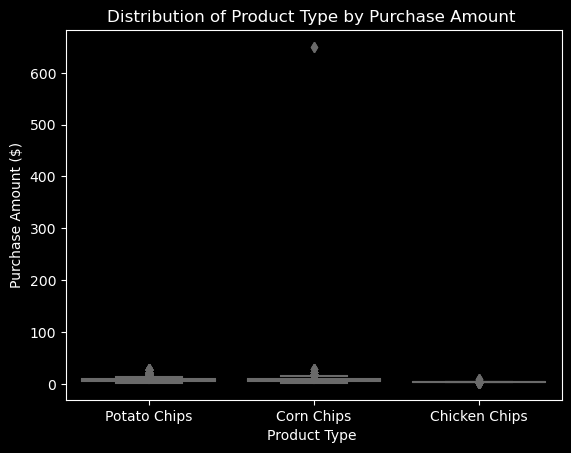

In [187]:
sns.boxplot(
    data = df,
    x = "product_type",
    y = "tot_sales"
)
plt.xlabel("Product Type ")
plt.ylabel("Purchase Amount ($)")
plt.title("Distribution of Product Type by Purchase Amount ");

#### Outlier Removal

In [188]:
df[df["prod_qty"] == 200]

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_qty,tot_sales,brand_name,product_type,product_name,pack_size,product_price,lifestage,premium_customer
65786,2018-08-19,226,226000,226201,4,200,650.0,Doritos,Corn Chips,Corn Chips Supreme,380,3.25,OLDER FAMILIES,Premium
65787,2019-05-20,226,226000,226210,4,200,650.0,Doritos,Corn Chips,Corn Chips Supreme,380,3.25,OLDER FAMILIES,Premium


In [189]:
quantity_mask = df["prod_qty"] < 200
df = df[quantity_mask]

<blockquote>The Box plot showed 2 extreme outliers with purchase quantities of 200. These extreme outliers were removed in order to normalize the mean. <br>Then removed all outlier data points beyond 3 standard deviations from the mean.</blockquote>

---

#### Heatmap Visualization for Correlation Matrix of Features

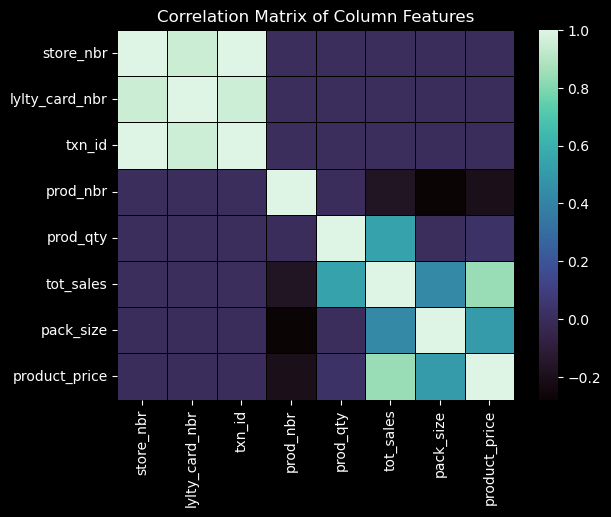

In [190]:
df_corr = df.select_dtypes("number").corr()
sns.heatmap(
    data = df_corr,
    linecolor = "black",
    linewidths = 0.5,
    cmap = "mako"
)
plt.title("Correlation Matrix of Column Features");

<blockquote>The heatmap shows us that the column features are not highly correlated. </blockquote>

---

#### __Key Objectives Overview:__
<blockquote>Identify consumer segments that drives sales and factors that influence the sales of higher priced products.
    <br>Revenue metrics for brands and products.
    <br>Evaluate time periods to identify sales trends.
</blockquote>

---

#### Sales Metrics

##### Sales by Purchase Frequency

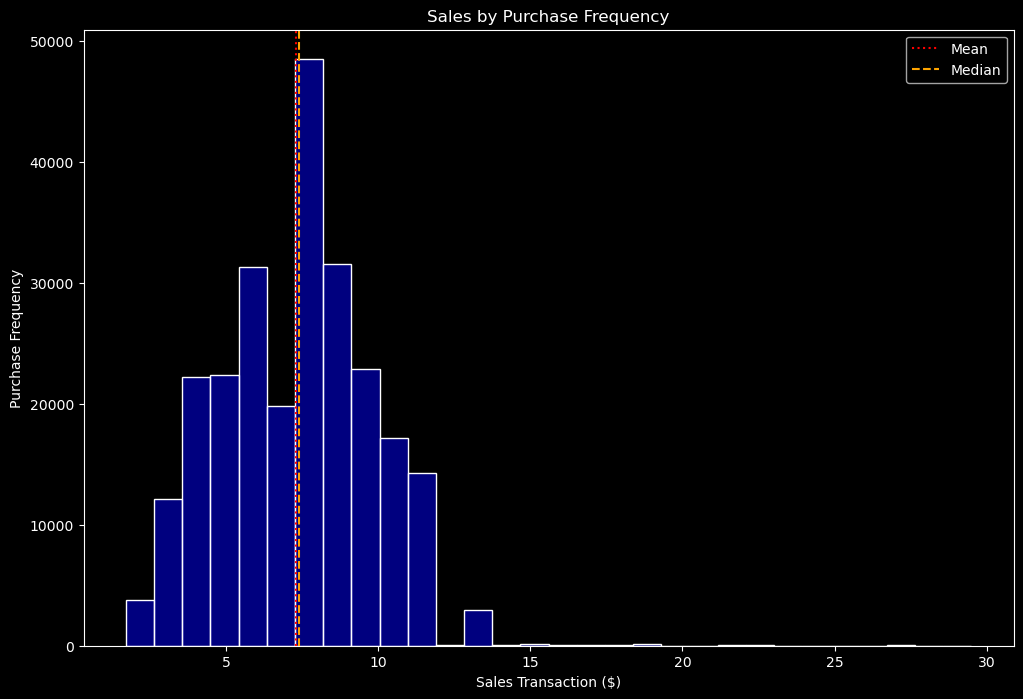

In [191]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.histplot(
    data = df["tot_sales"],
    color = "blue",
    bins = 30,
    alpha = 0.5,
)
plt.axvline(
    np.mean(df["tot_sales"]),
    color = "red",
    linestyle = ":",
    label = "Mean"
)
plt.axvline(
    np.median(df["tot_sales"]),
    color = "orange",
    linestyle = "--",
    label = "Median"
)
plt.xlabel("Sales Transaction ($)")
plt.ylabel("Purchase Frequency")
plt.title("Sales by Purchase Frequency")
plt.legend();

##### Product Price by Number of Transactions

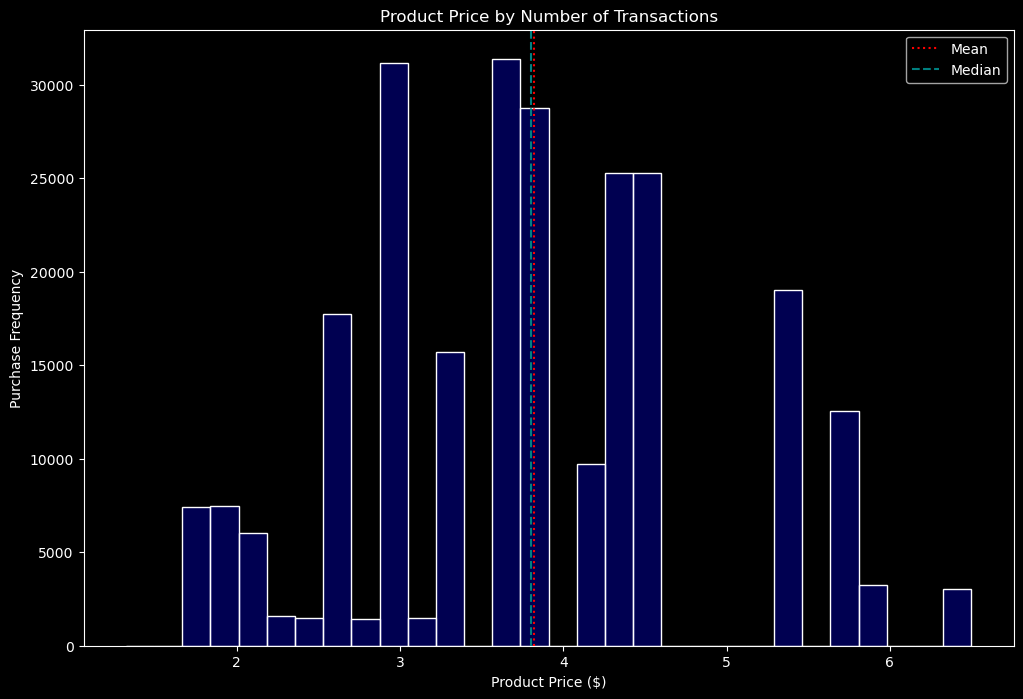

In [192]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.histplot(
    data = df["product_price"],
    color = "mediumblue",
    bins = 30,
    alpha = 0.4
)
plt.axvline(
    np.mean(df["product_price"]),
    color = "red",
    linestyle = ":",
    label = "Mean"
)
plt.axvline(
    np.median(df["product_price"]),
    color = "teal",
    linestyle = "--",
    label = "Median"
)
plt.xlabel("Product Price ($)")
plt.ylabel("Purchase Frequency")
plt.title("Product Price by Number of Transactions")
plt.legend();

##### Probability Density Function of Product Price

In [193]:
# xs = np.linspace(df["product_price"].min(), df["product_price"].max(), 100)
# ys1 = st.stats.norm.pdf(xs, loc = df["product_price"].mean(), scale = 1)

# plt.plot(xs, ys1, label = "normal approximation")
# plt.ylabel('Probability')
# plt.xlabel("Product Price")
# plt.title("Product Price PDF");

In [194]:
total_sales_revenue = df["tot_sales"].sum().round(2)
print(f"Total sales revenue amounted up to: ${total_sales_revenue}.")

Total sales revenue amounted up to: $1819778.4.


In [195]:
total_quantity_sold = df["prod_qty"].sum()
print(f"Total sales quantity sold: {total_quantity_sold} bags.")

Total sales quantity sold: 475909 bags.


In [196]:
print(f"The average amount of revenue received per bag: ${(total_sales_revenue / total_quantity_sold).round(2)}")

The average amount of revenue received per bag: $3.82


In [197]:
product_price = (df["product_price"] >=3) & (df["product_price"]<= 4.5)
df_product_price = df[product_price]["tot_sales"].sum().round(2)
print(f"{((df_product_price / total_sales_revenue).round(4))*100}% of revenue was generated by products between $3 and $4.50.")

52.93% of revenue was generated by products between $3 and $4.50.


In [198]:
high_product_price = df["product_price"] > 4.5
df_high_product_price = df[high_product_price]["tot_sales"].sum().round(2)
print(f"{((df_high_product_price / total_sales_revenue).round(5))*100}% of revenue was generated by high priced brands and bags.")

34.68% of revenue was generated by high priced brands and bags.


##### Sales Revenue Over Time

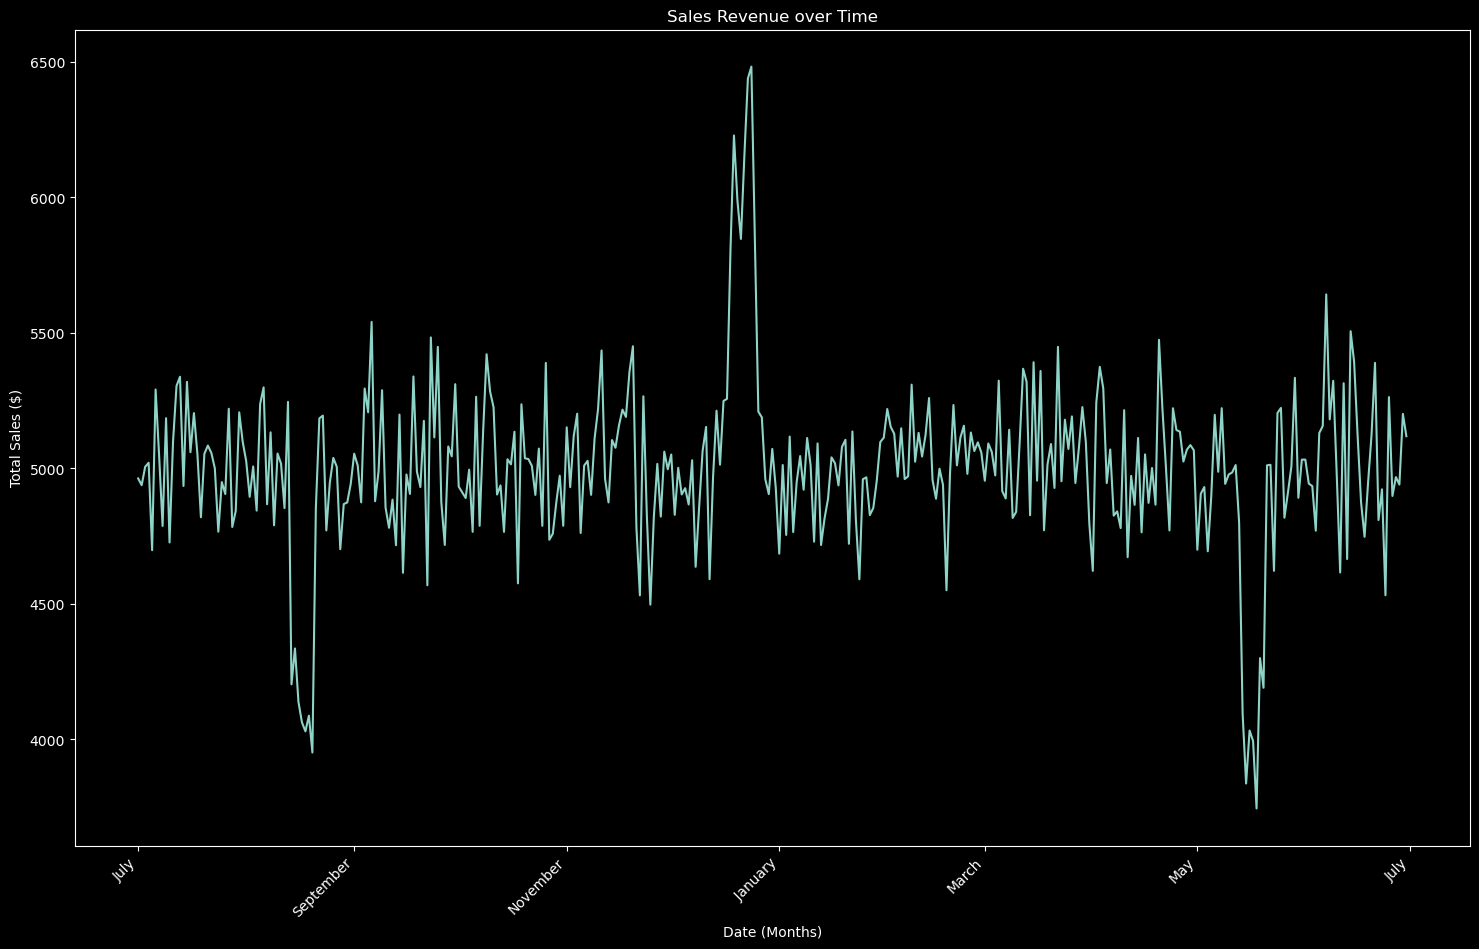

In [199]:
plt.figure(figsize = (18,12))
df.groupby("date")["tot_sales"].sum().plot(kind = "line")
loc, labels = plt.xticks()
plot_labels = ["July", "September", "November", " January", "March", "May", "July"]
plt.xticks(ticks = loc, labels = plot_labels, rotation = 45)
plt.xlabel("Date (Months)")
plt.ylabel("Total Sales ($)")
plt.title("Sales Revenue over Time");

#### __Sales Metrics Insights:__
<blockquote>Key Metrics:
    <br>Total Revenue was 1,808,654.55.
    <br>Total Sales Quantity was 473,350 bags.
    <br>Average Revenue per bag: 3.82.
    <br>
    <br>Sales Trends:
    <br>Sales significantly decreased in August just before September and again in early May.
    <br>Sales significantly increase over the Christmas Holiday season in December.
    <br>52.93% of purchase sales occured between the product prices of 3 and 4.5.
    <br>34.6% of purchase sales occured for products priced above 4.5. 
    <br>
    <br>Conclusion:
    <br>Sales promotions needs to take place in August, December and May.
    <br>A marketing strategy that targets consumers that purchase higher priced products would be effective.
    <br>Marketing for the larger bag sizes would also likely generate more revenue.
</blockquote>

---

#### Customer Segmentation Analysis

##### Count of Customers by Customer Segment

In [200]:
pd.crosstab(
    index = df["lifestage"],
    columns = df["premium_customer"],
    values = df["tot_sales"],
    aggfunc = "count"
).style.background_gradient(cmap = "mako")

premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,4766,11200,7734
NEW FAMILIES,2847,2207,1508
OLDER FAMILIES,21808,13411,10546
OLDER SINGLES/COUPLES,17345,17276,16741
RETIREES,14364,20202,12368
YOUNG FAMILIES,17995,12121,10919
YOUNG SINGLES/COUPLES,8687,19705,5917


#### Quantity of Products Sold by Customer Segment

In [201]:
pd.crosstab(
    index = df["lifestage"],
    columns = df["premium_customer"],
    values = df["prod_qty"],
    aggfunc = "sum"
).style.background_gradient(cmap = "mako")

premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,9019,21413,14626
NEW FAMILIES,5282,4097,2807
OLDER FAMILIES,42425,26132,20518
OLDER SINGLES/COUPLES,33204,33018,32042
RETIREES,27192,38114,23513
YOUNG FAMILIES,34936,23530,21156
YOUNG SINGLES/COUPLES,15689,36509,10687


#### Average Quantity of Products Sold by Customer Segment

In [202]:
pd.crosstab(
    index = df["lifestage"],
    columns = df["premium_customer"],
    values = df["prod_qty"],
    aggfunc = "mean"
).style.background_gradient(cmap = "mako")

premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,1.892363,1.911875,1.891130
NEW FAMILIES,1.855286,1.856366,1.861406
OLDER FAMILIES,1.945387,1.948550,1.945572
OLDER SINGLES/COUPLES,1.914327,1.911206,1.913984
RETIREES,1.893066,1.886645,1.901116
YOUNG FAMILIES,1.941428,1.941259,1.937540
YOUNG SINGLES/COUPLES,1.806032,1.852778,1.806152


##### Average Price by Customer Segment

In [203]:
df["avg_price"] = df["tot_sales"] / df["prod_qty"]
pd.crosstab(
    index = df["lifestage"],
    columns = df["premium_customer"],
    values = df["avg_price"],
    aggfunc = "mean"
).style.background_gradient(cmap = "mako")


premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,3.726028,3.981562,3.752993
NEW FAMILIES,3.907394,3.903557,3.855968
OLDER FAMILIES,3.730583,3.723238,3.702574
OLDER SINGLES/COUPLES,3.869798,3.800156,3.879726
RETIREES,3.912089,3.830613,3.907402
YOUNG FAMILIES,3.746367,3.709075,3.748487
YOUNG SINGLES/COUPLES,3.644112,4.054144,3.654149


##### Sales by Premium Customer Segmentation

In [204]:
pd.pivot_table(
    data = df,
    index = ["premium_customer"],
    values = ["prod_qty", "tot_sales"],
    aggfunc = ["sum","mean"]
).style.background_gradient(cmap = "mako")

##### Sales By Lifestage and Purchasing Habits

In [205]:
pd.crosstab(
    index = df["lifestage"],
    columns = df["premium_customer"],
    values = df["tot_sales"],
    aggfunc = "sum"
).style.background_gradient(cmap = "mako")

premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,33705.400000,85262.750000,55042.350000
NEW FAMILIES,20716.050000,16078.000000,10861.700000
OLDER FAMILIES,158379.950000,97280.850000,75983.000000
OLDER SINGLES/COUPLES,128683.800000,125737.100000,124457.050000
RETIREES,106606.200000,146328.750000,91951.950000
YOUNG FAMILIES,130919.050000,87227.850000,79249.100000
YOUNG SINGLES/COUPLES,57622.400000,148337.200000,39347.900000


##### Sales By Lifestage and Purchasing Habits in Percentage

In [206]:
pd.crosstab(
    index = df["lifestage"],
    columns = df["premium_customer"],
    values = df["tot_sales"],
    aggfunc = "sum",
    normalize = True
).style.background_gradient(cmap = "mako")

premium_customer,Budget,Mainstream,Premium
lifestage,,,
MIDAGE SINGLES/COUPLES,0.018522,0.046853,0.030247
NEW FAMILIES,0.011384,0.008835,0.005969
OLDER FAMILIES,0.087033,0.053458,0.041754
OLDER SINGLES/COUPLES,0.070714,0.069095,0.068391
RETIREES,0.058582,0.080410,0.050529
YOUNG FAMILIES,0.071942,0.047933,0.043549
YOUNG SINGLES/COUPLES,0.031665,0.081514,0.021622


##### Sales by Customer Lifestage Comparing Average Quantity and Total Sales

In [207]:
pd.pivot_table(
    data = df,
    index = ["lifestage"],
    values = ["prod_qty","tot_sales"],
    aggfunc = ["sum","mean"],
    sort = True
).style.background_gradient(cmap = "mako")

##### Sales by Lifestage & Premium Customer

In [208]:
pd.pivot_table(
    data = df,
    index = ["premium_customer", "lifestage"],
    values = ["tot_sales", "prod_qty"],
    aggfunc = ["sum", "mean"]
).style.background_gradient(cmap = "mako")

### A/B Testing
- Mainstream: Young to midage Customers
- Budget & Premium: Young to midage Customers

- We need to answer the following question: 
    
    Are Mainstream young to midage customers buying more expensive chips because there are more of them?


Therefore, we need to test whether the average purchase price for these two groups are statistically different.


In [209]:
df_mainstream = df[df["premium_customer"] == "Mainstream"]

In [210]:
condition = (df_mainstream["lifestage"] == "MIDAGE SINGLES/COUPLES") | (df_mainstream["lifestage"] == "YOUNG SINGLES/COUPLES")
segment_mainstream = df_mainstream[condition]

In [211]:
budget_premium_condition = (df["premium_customer"] == "Budget") | (df["premium_customer"] == "Premium")
df_budget_premium = df[budget_premium_condition]

budget_premium_condition = (df_budget_premium["lifestage"] == "MIDAGE SINGLES/COUPLES") | (df_budget_premium["lifestage"] == "YOUNG SINGLES/COUPLES")
segment_budget_premium = df_budget_premium[budget_premium_condition]



##### Sampling Analysis for Mainstream Young to Midage Customers

In [212]:
mainstream_avg_price = segment_mainstream["avg_price"].mean().round(2)
mainstream_var = segment_mainstream["avg_price"].var()
sample_size_mainstream = len(segment_mainstream)
mainstream_sigma = np.sqrt(mainstream_var / sample_size_mainstream)


In [213]:
print(f"Average purchase price:\t{mainstream_avg_price}")
print(f"Standard Deviation:\t{mainstream_sigma:.4f}")
print(f"Sample Size:\t\t{sample_size_mainstream}")

Average purchase price:	4.03
Standard Deviation:	0.0058
Sample Size:		30905


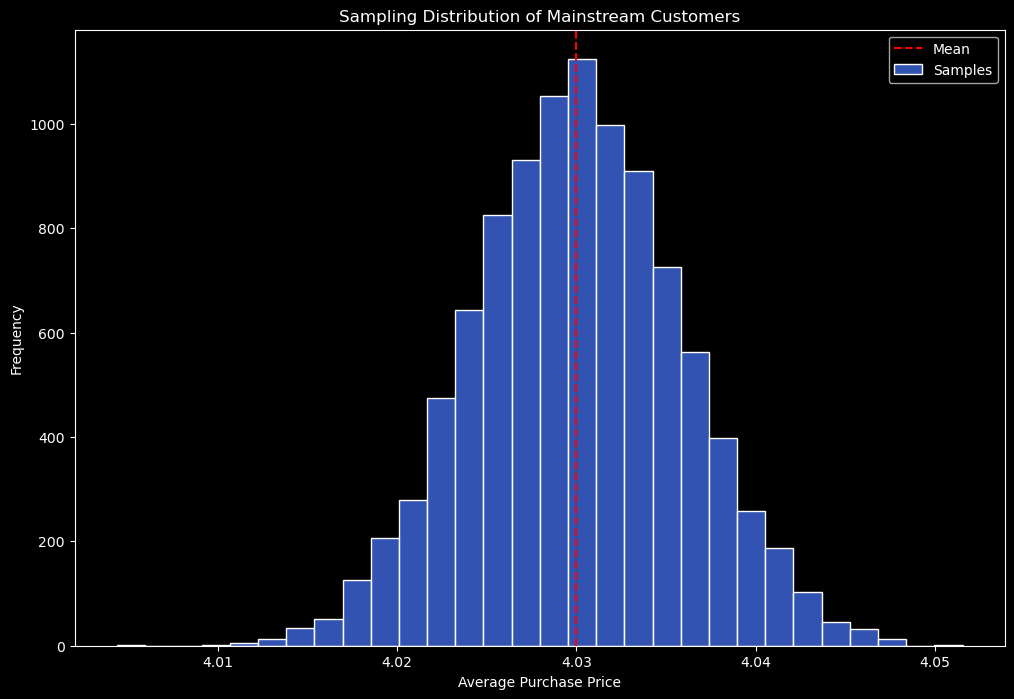

In [214]:
fig, ax = plt.subplots(figsize = (12, 8))

mainstream_sampling_dist = st.norm(
    loc = mainstream_avg_price,
    scale = mainstream_sigma
)

mainstream_samples = mainstream_sampling_dist.rvs(size = 10000)

sns.histplot(
    x = mainstream_samples,
    bins = 30,
    alpha = 0.8,
    color = "royalblue",
    label = "Samples"
)
plt.axvline(
    x = mainstream_avg_price,
    linestyle = "--",
    color = "red",
    label = "Mean" 
)
plt.xlabel("Average Purchase Price")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of Mainstream Customers")
plt.legend();

##### Sampling Analysis for Budget & Premium Young to Midage Customers

In [215]:
budget_premium_avg_price = segment_budget_premium["avg_price"].mean().round(2)
budget_premium_var = segment_budget_premium["avg_price"].var()
sample_size_budget_premium = len(segment_budget_premium)
budget_premium_sigma = np.sqrt(budget_premium_var / sample_size_budget_premium)

In [216]:
print(f"Average purchase price:\t{budget_premium_avg_price}")
print(f"Standard Deviation:\t{budget_premium_sigma:.4f}")
print(f"Sample Size:\t\t{sample_size_budget_premium}")

Average purchase price:	3.69
Standard Deviation:	0.0067
Sample Size:		27104


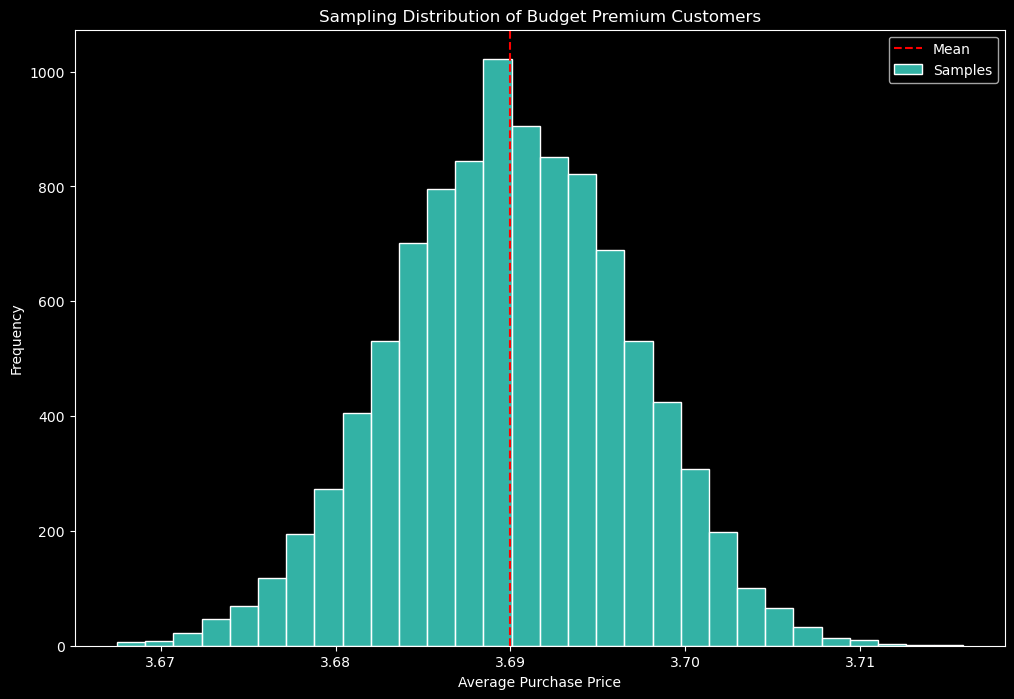

In [217]:
fig, ax = plt.subplots(figsize = (12, 8))

budget_premium_sampling_dist = st.norm(
    loc = budget_premium_avg_price,
    scale = budget_premium_sigma
)

budget_premium_samples = budget_premium_sampling_dist.rvs(size = 10000)

plot = sns.histplot(
    x = budget_premium_samples,
    bins = 30,
    alpha = 0.8,
    color = "turquoise",
    label = "Samples"
)
plt.axvline(
    x = budget_premium_avg_price,
    linestyle = "--",
    color = "red",
    label = "Mean" 
)
plot.set(
    xlabel = "Average Purchase Price", 
    ylabel = "Frequency", 
    title = "Sampling Distribution of Budget Premium Customers"
)
plt.legend();

### Difference of Sample Means Distribution

In [218]:
diff_mean = mainstream_avg_price - budget_premium_avg_price
diff_variance = (mainstream_var / sample_size_mainstream) + (budget_premium_var / sample_size_budget_premium)
diff_sigma = np.sqrt(diff_variance)
print(f"The difference in sample segment average price: {diff_mean:.2f}")
print(f"The standard deviation: {diff_sigma:.4f}")


The difference in sample segment average price: 0.34
The standard deviation: 0.0088


In [219]:
z_score = st.norm.ppf(0.975).round(2)
lower, upper = diff_mean - (z_score* diff_sigma), diff_mean + (z_score * diff_sigma) 
print(f"The 95% confidence interval for the difference in average price is between: {lower:.2f} and {upper:.2f}")

The 95% confidence interval for the difference in average price is between: 0.32 and 0.36


##### Hypothesis Testing


Null Hypothesis: 
- The mean difference in purchase price, μ = 0.

- There is no difference in the average purchase price between the segments. Therefore, the difference between the mainstream customer segment and the budget and premium customer segment would equal 0. 

- By extension, this means that the average price of the two customer segments should be also be equal.

Alternative Hypothesis:
- The mean difference in purchase price, μ != 0.

- There is a difference in the average purchase price between the customer segments.

Significance level: 5%


#### Sampling Distribution for the Difference in Average Purchase Price

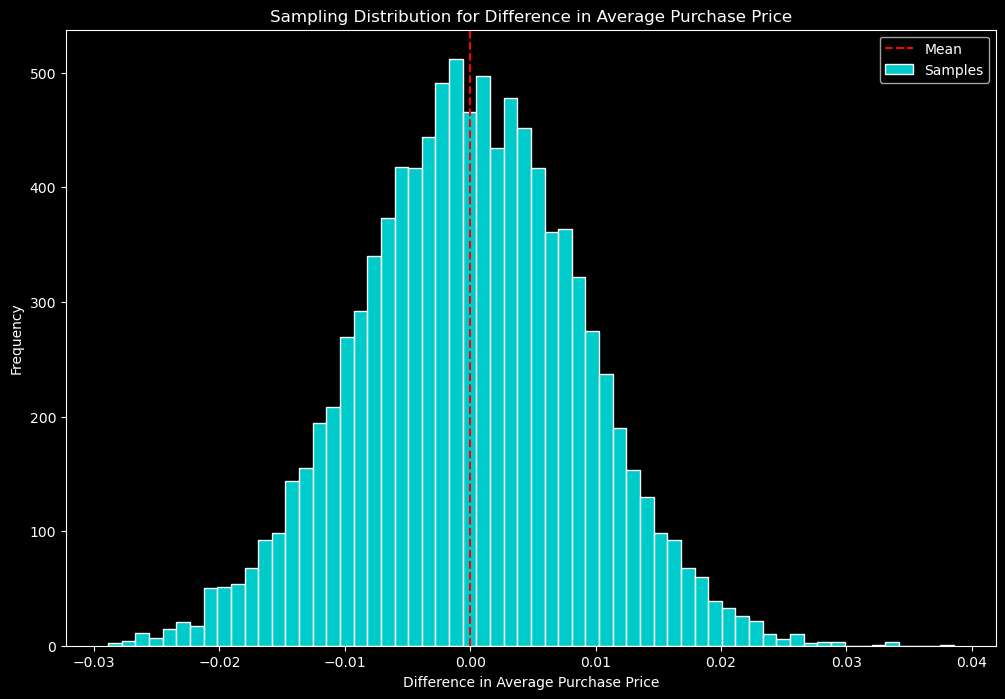

In [220]:
fig, ax = plt.subplots(figsize = (12, 8))
diff_sample_dist = st.norm(
    loc = 0,
    scale = diff_sigma
)

diff_samples = diff_sample_dist.rvs(size = 10000)

sns.histplot(
    x = diff_samples,
    color = "cyan",
    alpha = 0.8,
    label = "Samples"
)
plt.axvline(
    0,
    color = "red",
    ls = "--",
    label = "Mean"
)

plt.xlabel("Difference in Average Purchase Price")
plt.ylabel("Frequency")
plt.title("Sampling Distribution for Difference in Average Purchase Price")
plt.legend();


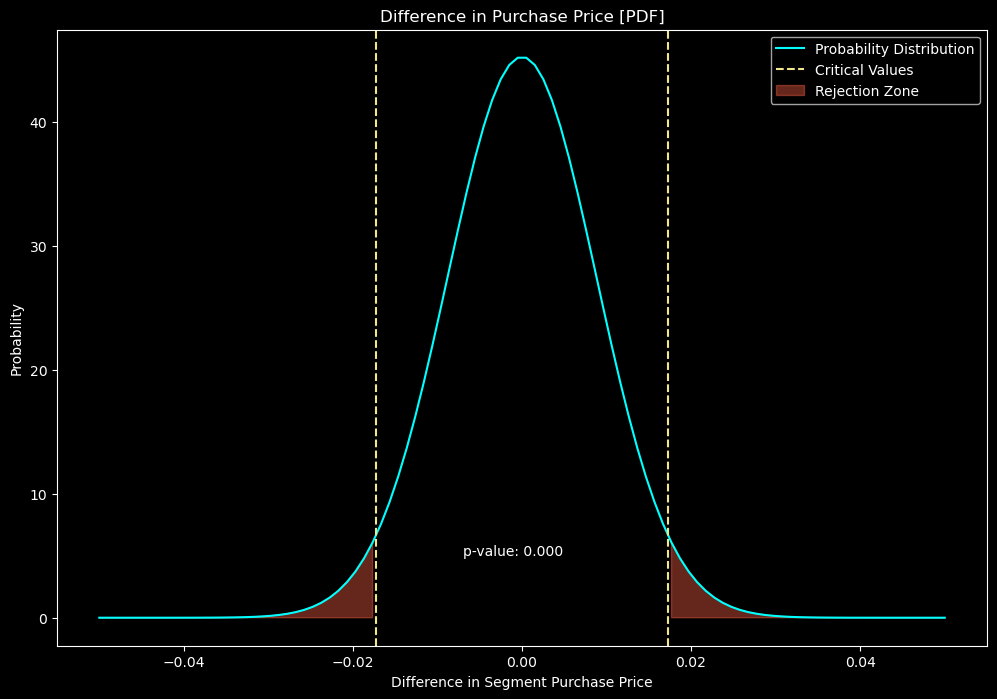

In [264]:
fig, ax = plt.subplots(figsize = (12, 8))
xs = np.linspace(-0.05, 0.05, 100)
ps = st.norm.pdf(xs, 0, diff_sigma)

lower_bound, upper_bound = 0 - (z_score * diff_sigma), 0 + (z_score * diff_sigma)

diff_z_score = (diff_mean - 0) / diff_sigma 

lower_threshold, upper_threshold = 0 - (diff_z_score * diff_sigma), 0 + (diff_z_score * diff_sigma)

lower_area = st.norm.cdf(
    lower_threshold,
    0,
    diff_sigma
)

upper_area = st.norm.sf(
    upper_threshold,
    0,
    diff_sigma
)

probability_area = lower_area + upper_area 

plt.plot(
    xs,
    ps,
    color = "aqua",
    label = "Probability Distribution"
)
plt.axvline(
    lower_bound,
    linestyle = "--",
    color = "khaki"
)
plt.axvline(
    upper_bound,
    linestyle = "--",
    color = "khaki",
    label = "Critical Values"
)
plt.fill_between(
    xs,
    ps,
    where = (xs <= lower_bound) | (xs>= upper_bound),
    color = "tomato",
    alpha = 0.4,
    label = "Rejection Zone"
    )

plt.annotate(f"p-value: {probability_area:.3f}", (-0.007, 5))
plt.title("Difference in Purchase Price [PDF]")
plt.xlabel("Difference in Segment Purchase Price")
plt.ylabel("Probability")
plt.legend();


In [222]:
segment_mainstream

,date,store_nbr,lylty_card_nbr,txn_id,prod_nbr,prod_qty,tot_sales,brand_name,product_type,product_name,pack_size,product_price,lifestage,premium_customer,avg_price
4767,2019-05-18,3,3159,1759,77,2,8.8,Doritos,Corn Chips,Nacho Cheese,170,4.4,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4768,2019-05-16,3,3294,2370,51,2,8.8,Doritos,Corn Chips,Mexicana,170,4.4,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4769,2018-08-18,4,4187,3492,89,2,10.8,Kettle,Potato Chips,Sweet Chilli & Sour Cream,175,5.4,MIDAGE SINGLES/COUPLES,Mainstream,5.4
4770,2019-05-19,4,4264,3841,47,2,8.8,Doritos,Corn Chips,Original,170,4.4,MIDAGE SINGLES/COUPLES,Mainstream,4.4
4771,2018-08-19,7,7036,6447,114,1,4.6,Kettle,Potato Chips,Sensations Siracha Lime,150,4.6,MIDAGE SINGLES/COUPLES,Mainstream,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243748,2018-12-01,272,272377,270186,75,2,7.6,Cobs Popd,Potato Chips,Sea Salt Chips,110,3.8,YOUNG SINGLES/COUPLES,Mainstream,3.8
243749,2018-07-27,272,272389,270200,114,2,9.2,Kettle,Potato Chips,Sensations Siracha Lime,150,4.6,YOUNG SINGLES/COUPLES,Mainstream,4.6
243750,2018-11-10,272,272389,270201,26,2,7.4,Pringles,Potato Chips,Sweet & Spicy BBQ,134,3.7,YOUNG SINGLES/COUPLES,Mainstream,3.7
243751,2019-04-01,272,272389,270202,62,2,7.4,Pringles,Potato Chips,Mystery Flavour,134,3.7,YOUNG SINGLES/COUPLES,Mainstream,3.7


#### __Customer Segmentation Insights:__
<blockquote> Consumer Segment: Premium
    <br>Older singles/couples segment had the highest sales with 31,869 packs and revenue of 123,668.95.
    <br>
    <br>Consumer Segment: Budget
    <br>The Older families lifestage segment had the highest sales at 42,425 packs and revenue of 158,379.95.
    <br>
    <br>Consumer Segment: Mainstream
    <br>The Mainstream Customer segment had the highest sales and quantity.
    <br>The Young Singles/Couples lifestage segment had the highest sales at 36,350 packs and revenue of 147,634.30. 
    <br>Retirees also had sales results that were very close at 37,968 packs sold with revenue of 146,328.75.
    <br> The older singles/couples lifestage segment was the customer segment with the strongest sales overall with total revenue of 376,366.65.
    <br>
    <br>Conclusion:
    <br>Target marketing towards older families, retirees, older singles/couples and young singles/couples would likely yield stronger sales results.
</blockquote>

---

#### Product Type Sales Analysis

##### Distribution of Chip Types by Sales Amount

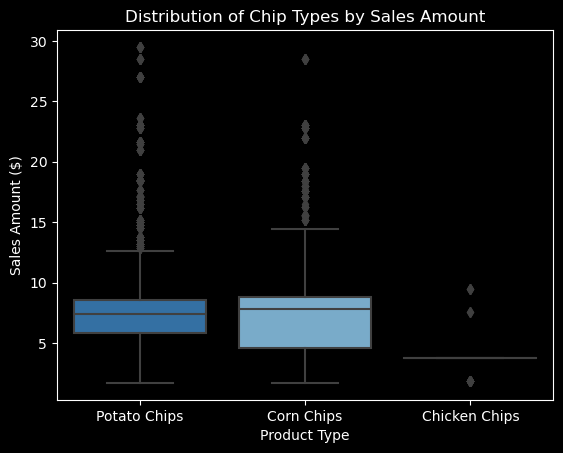

In [223]:
sns.boxplot(
    data = df,
    x = "product_type",
    y = "tot_sales",
    palette = "Blues_r"
)
plt.xlabel("Product Type")
plt.ylabel("Sales Amount ($)")
plt.title("Distribution of Chip Types by Sales Amount");

##### Product Type by Quantity and Total Revenue

In [224]:
pd.pivot_table(
    data = df,
    index = "product_type",
    values = ["prod_qty", "tot_sales"],
    aggfunc = ["sum"],
    sort = False
).style.background_gradient(cmap = "mako")

##### Total Sales by Product Quantity

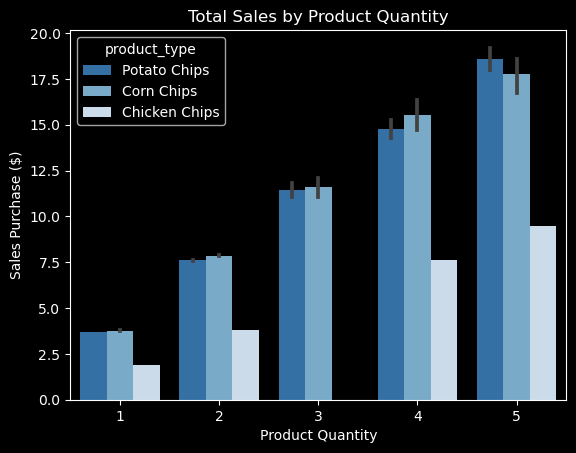

In [225]:
sns.barplot(
    data = df,
    x = "prod_qty",
    y = "tot_sales",
    hue = "product_type",
    palette = "Blues_r"
)
plt.xlabel("Product Quantity")
plt.ylabel("Sales Purchase ($)")
plt.title("Total Sales by Product Quantity");

##### Chip Product Type by Transactions

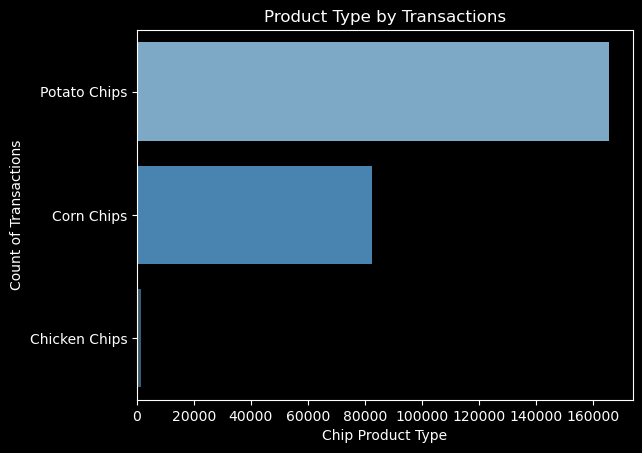

In [226]:
barplot_df = df["product_type"].value_counts().reset_index()

sns.barplot(
    data = barplot_df,
    x = "count",
    y = "product_type",
    palette = "Blues_d"
)
plt.xlabel("Chip Product Type")
plt.ylabel("Count of Transactions")
plt.title("Product Type by Transactions");

##### Potato Chips Sales by Transactions

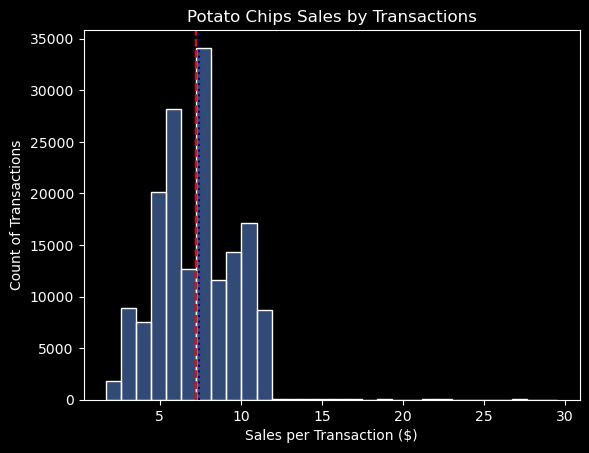

In [227]:
sns.histplot(
    data = df.query('product_type == "Potato Chips"')["tot_sales"],
    color = "cornflowerblue",
    alpha = 0.5,
    bins = 30
)
plt.axvline(
    np.mean(df.query('product_type == "Potato Chips"')["tot_sales"]),
    color = "red",
    ls = "--",
)
plt.axvline(
    np.median(df.query('product_type == "Potato Chips"')["tot_sales"]),
    color = "darkblue",
    linestyle = ":"
)
plt.xlabel("Sales per Transaction ($)")
plt.ylabel("Count of Transactions")
plt.title("Potato Chips Sales by Transactions");

##### Corn Chips Sales by Transactions

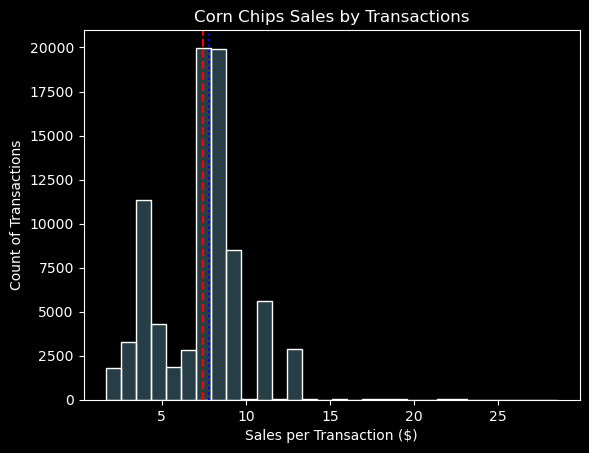

In [228]:
sns.histplot(
    data = df.query('product_type == "Corn Chips"')["tot_sales"],
    color = "skyblue",
    alpha = 0.3,
    bins = 30,
)
plt.axvline(
    np.mean(df.query('product_type == "Corn Chips"')["tot_sales"]),
    color = "red",
    ls = "--"
)
plt.axvline(
    np.median(df.query('product_type == "Corn Chips"')["tot_sales"]),
    color = "blue",
    ls = ":")
plt.xlabel("Sales per Transaction ($)")
plt.ylabel("Count of Transactions")
plt.title("Corn Chips Sales by Transactions");

##### Chicken Chips Sales by Transactions

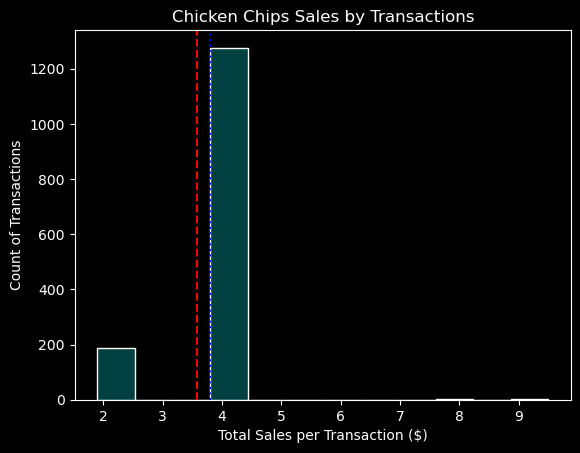

In [229]:
sns.histplot(
    data = df.query('product_type == "Chicken Chips"')["tot_sales"],
    color = "teal",
    alpha = 0.5
)
plt.axvline(
    np.mean(df.query('product_type == "Chicken Chips"')["tot_sales"]),
    color = "red",
    ls = "--"
)
plt.axvline(
    np.median(df.query('product_type == "Chicken Chips"')["tot_sales"]),
    color = "blue",
    ls = ":"
)
plt.xlabel("Total Sales per Transaction ($)")
plt.ylabel("Count of Transactions")
plt.title("Chicken Chips Sales by Transactions");

In [230]:
potato_chip_sales = df.query('product_type == "Potato Chips"')["tot_sales"].sum().round(2)
potato_chip_qty = df.query('product_type == "Potato Chips"')["prod_qty"].sum()

print(f"Potato Chip Sales represent {(potato_chip_sales / total_sales_revenue).round(2) *100}% of the total sales revenue \
and {(potato_chip_qty / total_quantity_sold).round(3) * 100}% of the total quantity of chips sold.")

Potato Chip Sales represent 66.0% of the total sales revenue and 66.3% of the total quantity of chips sold.


In [231]:
print(f"The average sales revenue recieved per pack of chips\
 made from potatoes was: ${(potato_chip_sales / potato_chip_qty).round(2)}.")

The average sales revenue recieved per pack of chips made from potatoes was: $3.79.


In [232]:
corn_chip_sales = df.query('product_type == "Corn Chips"')["tot_sales"].sum().round(2)
corn_chip_qty = df.query('product_type == "Corn Chips"')["prod_qty"].sum()

print(f"Chips made from corn represent {(corn_chip_sales / total_sales_revenue).round(2) * 100}% of the total sales \
revenue and make up {(corn_chip_qty / total_quantity_sold).round(3) * 100}% of the total quantity of chips sold.")

Chips made from corn represent 34.0% of the total sales revenue and make up 33.1% of the total quantity of chips sold.


In [233]:
print(f"The average sales revenue recieved from each pack of chips made \
from corn was: ${(corn_chip_sales / corn_chip_qty).round(2)}.")

The average sales revenue recieved from each pack of chips made from corn was: $3.92.


In [234]:
chicken_chip_sales = df.query('product_type == "Chicken Chips"')["tot_sales"].sum().round(2)
chicken_chip_qty = df.query('product_type == "Chicken Chips"')["prod_qty"].sum()

print(f"Chips made from chicken breast meat represent {(chicken_chip_qty / total_sales_revenue).round(5) * 100}% of the total sales \
revenue and make up {(chicken_chip_qty / total_quantity_sold).round(4) * 100}% of the total quantity of chips sold.")

Chips made from chicken breast meat represent 0.152% of the total sales revenue and make up 0.58% of the total quantity of chips sold.


In [235]:
print(f"The average sales revenue recieved from each pack of chips made from \
chicken breast meat was: ${(chicken_chip_sales / chicken_chip_qty).round(2)}.")

The average sales revenue recieved from each pack of chips made from chicken breast meat was: $1.9.


In [236]:
print(f"Corn chips recieved ${(corn_chip_sales / corn_chip_qty).round(2) - (potato_chip_sales / potato_chip_qty).round(2)} more per bag.")

Corn chips recieved $0.1299999999999999 more per bag.


#### __Product Type Sales Insights:__
<blockquote>Potato Chips:
    <br>Potato Chip sales generated 66% of total sales revenue and 66.3% of the total quantity of bags sold.
    <br>Potato chip brands sold almost 2x as many bags compared to brands that produced chips made from corn.
    <br>The majority of Potato chip sales transactions were between 5 and 8.
    <br>
    <br>Corn Chips: 
    <br>Corn chip products generated the most revenue per bag sold at $3.92.
    <br>Corn chip products recieved 13 cents more revenue per bag on avarage than potato chips.
    <br>The majority of Corn chip sales transactions were between 7 and 10.
    <br>
    <br>Conclusion:
    <br>Sales promotions for corn chip products would increase sales. 
</blockquote>

---

#### Product Size & Quantity Analysis

##### Chip Quantity Sales by Transactions

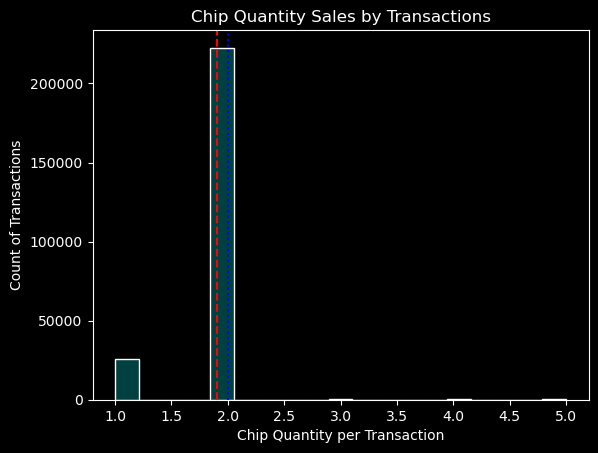

In [237]:
sns.histplot(
    df["prod_qty"],
    color = "teal",
    alpha = 0.5,
)
plt.axvline(
    np.mean(df["prod_qty"]),
    color = "red",
    ls = "--"
)
plt.axvline(
    np.median(df["prod_qty"]),
    color = "blue",
    ls = ":"
)
plt.xlabel("Chip Quantity per Transaction")
plt.ylabel("Count of Transactions")
plt.title("Chip Quantity Sales by Transactions");

##### Total Sales and Average Sales by Product Quantity

In [238]:
pd.pivot_table(
    data = df,
    index = "prod_qty",
    values = "tot_sales",
    aggfunc = ["sum","mean"]
).style.background_gradient(cmap = "mako")

,sum,mean
,tot_sales,tot_sales
prod_qty,,
1,95937.000000,3.712158
2,1705824.500000,7.662598
3,4742.850000,11.511772
4,5616.600000,14.977600
5,7657.450000,18.275537


##### Sales Revenue by Pack Size

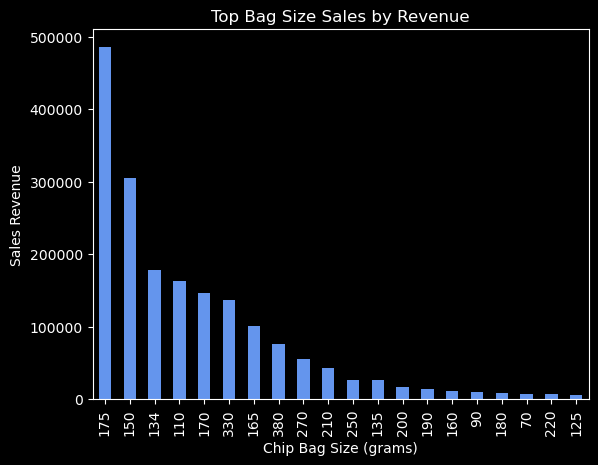

In [239]:
(
    df.groupby("pack_size")["tot_sales"]
    .sum()
    .sort_values(
        ascending = False
    )
    .plot(
        kind = "bar", 
        color = "cornflowerblue"
    )
)
plt.xlabel("Chip Bag Size (grams)")
plt.ylabel("Sales Revenue")
plt.title("Top Bag Size Sales by Revenue");

##### Bag Size(g) and Sales Quantity by Total Sales Revenue 

In [240]:
pd.pivot_table(
    data = df,
    index = "pack_size",
    columns = ["prod_qty"],
    values = "tot_sales",
    aggfunc = "sum"
).style.background_gradient(cmap = "mako")

prod_qty,1,2,3,4,5
pack_size,,,,,
70,436.800000,6307.200000,14.400000,57.600000,36.000000
90,625.600000,8904.600000,40.800000,20.400000,85.000000
110,8002.800000,153504.800000,342.000000,326.800000,589.000000
125,399.000000,5283.600000,12.600000,16.800000,21.000000
134,9094.600000,166592.500000,444.000000,592.000000,932.400000
135,1356.600000,24553.200000,63.000000,33.600000,84.000000
150,16122.000000,285216.800000,813.900000,913.600000,1222.200000
160,720.100000,9766.000000,34.200000,60.800000,66.500000
165,5842.800000,94401.200000,337.800000,372.800000,406.000000


##### Average Sales Revenue for each Bag Size

In [241]:
pack_size_pivot = pd.pivot_table(
    data = df,
    index = "pack_size",
    values = ["tot_sales"],
    aggfunc = ["mean","median"],
)
(
    pack_size_pivot
    .sort_values(by = "pack_size", ascending = False)
    .style.background_gradient(cmap = "mako")
)

,mean,median
,tot_sales,tot_sales
pack_size,,
380,11.754925,11.800000
330,10.908636,11.400000
270,8.818679,9.200000
250,8.234995,8.600000
220,4.367647,4.600000
210,6.863648,7.200000
200,3.578694,3.800000
190,4.812321,3.600000


##### Product Quantity and Total Sales Grouped by Pack Size

In [242]:
(
    df.groupby("pack_size")[["prod_qty", "tot_sales"]]
    .sum()
    .sort_values(
        by = "tot_sales",
        ascending = False
    )
).style.background_gradient(cmap = "mako")

,prod_qty,tot_sales
pack_size,,
175,126465,485431.400000
150,82174,304288.500000
134,48019,177655.500000
110,42835,162765.400000
170,38088,146673.000000
330,23999,136794.300000
165,29051,101360.600000
380,12273,75419.600000
270,12049,55425.400000


__Pack Size Analysis Insights:__
<blockquote>Bag Size:
    <br>The top 5 Bag sizes(g): 175, 150, 134, 110, 170. 
    <br>Bag size of 175g generated revenue of 482,094.40.
    <br>Bag size of 150g generated revenue of 302,922.40.
    <br>Bag size of 134g generated revenue of 176138.50.
    <br>The bag sizes 175 and 150 have significantly more transaction purchases than the 3rd bag size of 134g.
    <br>The bag size 330 generates almost as much revenue as the 170.
    <br>
    <br>Product Quantity:
    <br>Consumers typically favor buying 2 bags in a single purchase transaction.
    <br>This holds especially true for the larger bag sizes.
    <br>
    <br>Conclusion:
    <br>Developing a promotion marketing strategy to increase purhases of 2 bags with the 175g and 150g bags sizes would likely yield positive results.
</blockquote>

---

#### Product Brand Analysis

##### Chip Brand by Sales Revenue

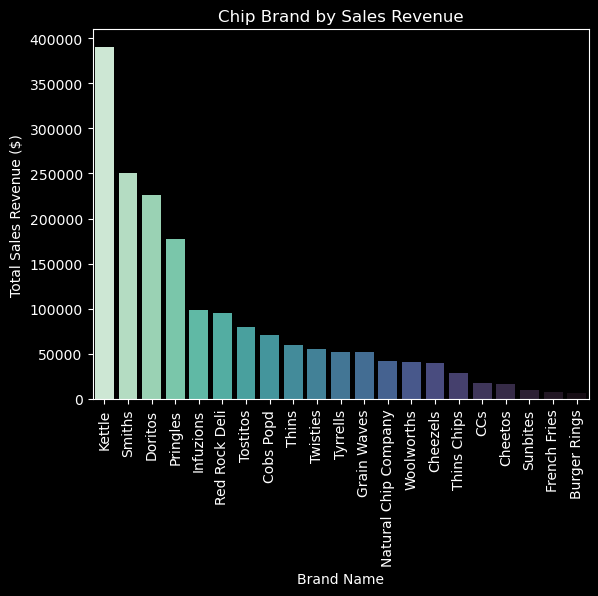

In [243]:
brand_sales = (
    df.groupby("brand_name")["tot_sales"]
    .sum()
    .sort_values(
        ascending = False
    )
    .reset_index()
)
ax = sns.barplot(
    data = brand_sales,
    x = "brand_name",
    y = "tot_sales",
    palette = "mako_r"
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.xlabel("Brand Name")
plt.ylabel("Total Sales Revenue ($)")
plt.title("Chip Brand by Sales Revenue");

##### Brands by Total Sales Revenue and Total Quantity Sold

In [244]:
(
    df.groupby("brand_name")[["prod_qty","tot_sales"]]
    .sum()
    .sort_values(
        "tot_sales",
        ascending = False
    )
).style.background_gradient(cmap = "mako")

,prod_qty,tot_sales
brand_name,,
Kettle,79051,390239.800000
Smiths,66406,250750.900000
Doritos,48331,226329.900000
Pringles,48019,177655.500000
Infuzions,27119,99047.600000
Red Rock Deli,33646,95046.000000
Tostitos,18134,79789.600000
Cobs Popd,18571,70569.800000
Thins,18107,59739.900000


##### Top 10 Products by Total Sales Revenue

In [245]:
(
    df.groupby(["brand_name","product_name","pack_size"])[["prod_qty","tot_sales"]]
    .sum()
    .sort_values(by = "tot_sales" ,ascending = False)
    .head(10)
).style.background_gradient(cmap = "mako")

##### Top 10 Product Sales Revenue

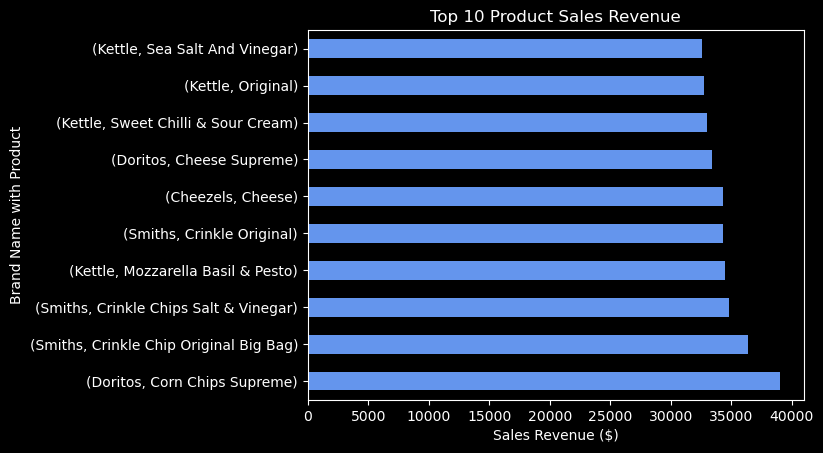

In [246]:
(
    df.groupby(["brand_name","product_name"])["tot_sales"]
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .plot(kind = "barh", color = "cornflowerblue")
)
plt.xlabel("Sales Revenue ($)")
plt.ylabel("Brand Name with Product")
plt.title("Top 10 Product Sales Revenue");

##### Top 10 products by Product Quantity

In [247]:
(
    df.groupby(["brand_name","product_name", "pack_size"])[["prod_qty","tot_sales"]]
    .sum()
    .sort_values(by = "prod_qty",ascending = False)
    .head(10)
).style.background_gradient(cmap = "mako")

__Product Brand Analysis Insights:__
<blockquote>Doritos Supreme is the best selling corn based product and the best overall selling product with 6,134 packs sold and  generating revenue of 38,918.75.
<br>    
<br>The Mozzarella Basil and Pesto product sold 6,284 packs and Tortilla Chips Honey and Jalapeno Chili sold 6,258 packs.
<br>Kettle is the brand with the most sales with 78,423 packs sold and generated revenue of 387,066.20.
<br>Smiths sold the second most bags with 66,152 packs and generated revenue of 249,464.10.
<br>
<br>The Kettle brand produced the top 3 products with the greatest quantity sold.
<br>
<br>Doritos and Pringles had similar sales quantity numbers with Doritos selling 48,007 packs and Pringles with 47609 packs.
<br>Doritos produced 224,891.95 and Pringles produced 176,138.50 revenue.
<br>Due to Doritos products having a higher price point and larger bag sizes caused the brand to generate more revenue.
</blockquote>

---

#### High Ticket Items Analysis

##### Consumer Segment by Total Product Quantity and Total Sales Revenue

In [248]:
df_high = df.copy()
high_mask = df_high["product_price"] > 4.5
high_ticket_products = df_high[high_mask]

pd.pivot_table(
    data = high_ticket_products,
    index = "premium_customer",
    values = ["prod_qty", "tot_sales"],
    aggfunc = ["sum", "mean"]
).style.background_gradient(cmap = "mako")

##### Lifestage Segment by Product Quantity and Total Sales Revenue

In [249]:
pd.pivot_table(
    data = high_ticket_products,
    index = "lifestage",
    values = ["prod_qty", "tot_sales"],
    aggfunc = ["sum", "mean"]
).style.background_gradient(cmap = "mako")

##### Consumer and Lifestage Segements by Product Quantity and Total Sales Revenue

In [250]:
pd.pivot_table(
    data = high_ticket_products,
    index = ["premium_customer", "lifestage"],
    values = ["tot_sales", "prod_qty"],
    aggfunc = ["sum", "mean"]
).style.background_gradient(cmap = "mako")

##### Brands by Sales Revenue

In [251]:
(
    high_ticket_products
    .groupby("brand_name")[["prod_qty","tot_sales"]]
    .sum()
    .sort_values(
        "tot_sales",
        ascending = False
    )
).style.background_gradient(cmap = "mako")

,prod_qty,tot_sales
brand_name,,
Kettle,72821,364109.400000
Smiths,18288,105474.400000
Doritos,11765,71786.100000
Twisties,12049,55425.400000
Cheezels,6017,34296.900000


##### Chip Brand by Sales Revenue

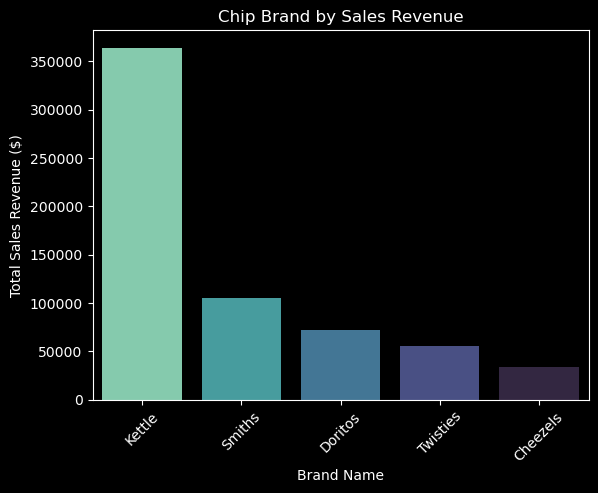

In [252]:
brand_sales_high = (
    high_ticket_products
    .groupby("brand_name")["tot_sales"]
    .sum()
    .sort_values(
        ascending = False
    )
    .reset_index()
)
ax = sns.barplot(
    data = brand_sales_high,
    x = "brand_name",
    y = "tot_sales",
    palette = "mako_r"
)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.xlabel("Brand Name")
plt.ylabel("Total Sales Revenue ($)")
plt.title("Chip Brand by Sales Revenue");

##### Top 10 Product Sales by Total Sales Revenue

In [253]:
(
    high_ticket_products
    .groupby(["brand_name","product_name","pack_size"])[["prod_qty","tot_sales"]]
    .sum()
    .sort_values("tot_sales",ascending = False)
    .head(10)
).style.background_gradient(cmap = "mako")

##### Top 10 Product Sales Revenue

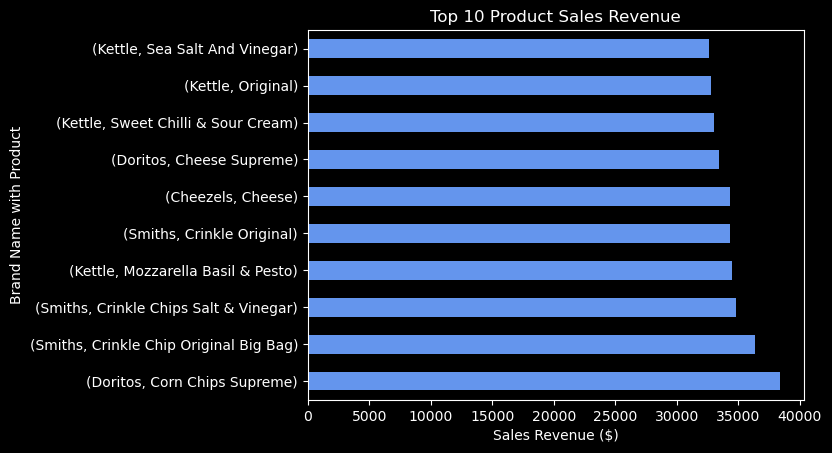

In [254]:
(
    high_ticket_products
    .groupby(["brand_name","product_name"])["tot_sales"]
    .sum()
    .sort_values(ascending = False)
    .head(10)
    .plot(kind = "barh", color = "cornflowerblue")
)
plt.xlabel("Sales Revenue ($)")
plt.ylabel("Brand Name with Product")
plt.title("Top 10 Product Sales Revenue");

##### Top 10 Product Sales by Total Quantity

In [255]:
(
    high_ticket_products
    .groupby(["brand_name","product_name", "pack_size"])[["prod_qty","tot_sales"]]
    .sum()
    .sort_values("prod_qty",ascending = False)
    .head(10)
).style.background_gradient(cmap = "mako")

##### Top Bag Size Sales by Revenue

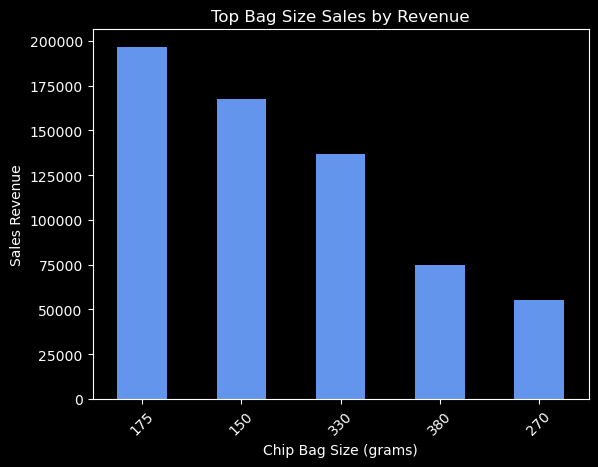

In [256]:
(
    high_ticket_products
    .groupby("pack_size")["tot_sales"]
    .sum()
    .sort_values(
        ascending = False
    )
    .plot(
        kind = "bar", 
        color = "cornflowerblue"
    )
)
loc, labels = plt.xticks()
plot_labels = ["175", "150", "330", "380", "270"]
plt.xticks(ticks = loc, labels = plot_labels, rotation = 45)
plt.xlabel("Chip Bag Size (grams)")
plt.ylabel("Sales Revenue")
plt.title("Top Bag Size Sales by Revenue");

##### Product Quantity and Total Sales by Pack Size

In [257]:
(
    high_ticket_products
    .groupby("pack_size")[["prod_qty","tot_sales"]]
    .sum()
    .sort_values(
        by = "tot_sales",
        ascending = False
    )
).style.background_gradient(cmap = "mako")

,prod_qty,tot_sales
pack_size,,
175,36416,196646.400000
150,36405,167463.000000
330,23999,136794.300000
380,12071,74763.100000
270,12049,55425.400000


##### High Ticket Product Sales Metrics

In [258]:
print("High priced products produced revenue of ${}.".format(
    high_ticket_products["tot_sales"].sum())
)

High priced products produced revenue of $631092.2.


In [259]:
print("High priced products sold {} bags.".format(
    high_ticket_products["prod_qty"].sum())
)

High priced products sold 120940 bags.


In [260]:
print("High priced products generated {}% of total revenue.".format(
    (high_ticket_products["tot_sales"].sum() 
    / total_sales_revenue).round(5) 
    * 100)
)

High priced products generated 34.68% of total revenue.


In [261]:
print("High priced products sold {}% of the total sales quantity.".format(
    (high_ticket_products["prod_qty"].sum() 
    / total_quantity_sold).round(5) 
    * 100)
)

High priced products sold 25.412000000000003% of the total sales quantity.


#### __High Ticket Products Insights:__
<blockquote>Sales Metrics: 
<br>High priced products generated 34.598% of total revenue and sold 25.335%of the total sales quantity.
<br>This means that a significant portion of revenue comes from high priced products.
<br>
<br>Customer Segmentation:
<br>Premium Customer Segment: The Mainstream segment had generated the most revenue at 247,658.80 and sales of 47,511 packs.
<br>
<br>Lifestage Segment: 
<br>The Older Singles/Couples segment generated the most revenue at 132,204.10
<br>and sales of 25,364 packs.
<br>The Retirees segment also had very high sales numbers at 122,471.80 and sales of 23,485 packs. 
<br>The Older Families segment had produced revenues of 107,556.50 and 20,598 packs.
<br>Mainstream Segment: Out of all the individual lifestage segments the Young Singles/Couples segment had generated the most revenue  at 57,878.60 with 11,086 packs sold.
<br>
<br>Product Segment:
<br>The Kettle brand vastly outsold every other brand in this product segment with 72,221 packs sold.
<br>Smiths was second with 18,123 and Twisties with 11,944.
<br>
<br>Bag sizes
<br>The bag sizes: 175, 150, 330, 380 and 270 were the key sizes for this product segment.
<br>
<br>Conclusion:
<br>Focusing on the Older Singles/Couples, Older Families and Retirees lifestage segments should increase revenue and sales quantities.
</blockquote>

---

#### __Strategy Recommendations:__
<blockquote>
    <br>Lifestage Segments:
    <br>Target marketing on older singles/couples, older families, retirees and young singles/couples segments:
    <br>
    <br>Consumer Segments:
    <br>Attention should be on the Mainstream segment. 
    <br>This segment drives the most sales revenue.
    <br>
    <br>Bag sizes:
    <br>Focus marketing on the popular bag sizes which were 175, 150, 330, 380 and 270g.
    <br>Promotions for 2 bag purchases per transaction, especially for larger bag sizes.
    <br>
    <br>Brands:
    <br>Marketing centered on Kettle, Doritos, Smith's, Pringles and Twisties brands.
    <br>
    <br>Sales Trends:
    <br>Sales promotions needs to take place in August, December and May. 